#####  14/02/2024 Week - 2            Applied ML Course(Spring 2024)                   Tetali Vamsi Krishna - Student id 20026983.           

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data from csv file.

data_df=pd.read_csv("C:\\Users\\vamsi\\Downloads\\HW2-1\\data2.txt",sep=',',header=None,names=['X-data','Y-data'])

print(data_df[:5])

C:\Users\vamsi\AppData\Local\Temp\ipykernel_13040\3549867901.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   X-data   Y-data
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


#### Plotting data relavently ie., 1rst Column data as X -axis Data and 2and Column as Y-axis Data.

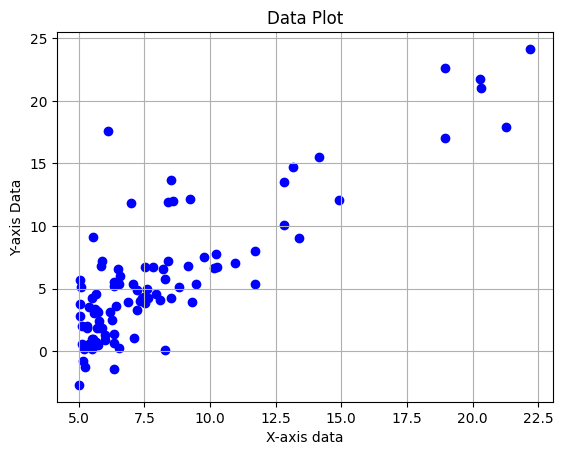

In [68]:
# Plotting
plt.scatter(data_df.iloc[:,0], data_df.iloc[:,1],color='blue')
plt.xlabel('X-axis data')
plt.ylabel('Y-axis Data')
plt.title('Data Plot')
plt.grid(True)
plt.show()

#### finding normal equation co-efficients wo and w1. For that adding a bias term ie., first column values are all 1's. This is to transform equation into vector form.

In [83]:
# Split the data into features (X) and target variable (y)
x_data = data_df.iloc[:,0]
y_data= data_df.iloc[:,1]

print(x_data.shape)
X=np.array(x_data)

# Add bias term to the features
X_b = np.concatenate((np.ones((len(X), 1)), X.reshape(-1, 1)),axis=1)

# Normal equation method
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_data)

# Extract coefficients
w0_normal = theta_normal[0]
w1_normal = theta_normal[1]

print("Coefficients using Normal Equation:")
print("w0 (intercept):", w0_normal)
print("w1 (slope):", w1_normal)



(97,)
Coefficients using Normal Equation:
w0 (intercept): -3.8957808783118506
w1 (slope): 1.1930336441895937


#### Spliting the data into 80% and 20%, by unsig iloc concept. iloc[row,column]

In [172]:
total_rows=data_df.shape[0]
train_and_test_split=int(0.8*total_rows)
#print(train_and_test_split)

x_train,x_test=data_df.iloc[0:train_and_test_split,0],data_df.iloc[train_and_test_split:,0]
y_train,y_test=data_df.iloc[0:train_and_test_split,1],data_df.iloc[train_and_test_split:,1]

print(y_train.shape)
print(y_test.shape)
print(type(y_train))

(77,)
(20,)
<class 'pandas.core.series.Series'>


#### Wrting batch gradient descent function for learning rate 0.01 and num of iterations are 1000, with termination condition as cost function.

In [173]:
# taking x anf y as inputs.

def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    mse_history = []

    for iteration in range(num_iterations):

        #Calculating gradients
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        
        #finding theta value.
        theta -= learning_rate * gradients[0,0]

        #Calulating Mean Square Error.
        mse = np.mean((X.dot(theta) - y) ** 2)
        mse_history.append(mse)
        
        #Adding Cost function.
        cost_function = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        
        #print("MSE :", mse ,"Cost_function :", cost_function)
        if mse > cost_function:
            break
    
    return theta, mse_history

#### Writing Stochastic Gradient Descent Function for attributes same as above.

In [174]:
#Taking X and Y dat as attributes.

def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    mse_history = []

    for iteration in range(num_iterations):
        for i in range(m):
            #We are iterating through each value of X values as it is Stochastic Gradient Descent.

            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients.ravel()  # Flatten gradients to match theta shape
            mse = np.mean((X.dot(theta) - y) ** 2)
            mse_history.append(mse)

            cost_function = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
            if mse > cost_function:
                break
    
    return theta, mse_history

#### Now, we'll compute the gradient descent value theta, MSE, and iterations for both training and testing datasets using both Batch and Stochastic algorithms.

In [184]:
#Converting Series data type into Np array.
x_train_numpy=np.array(x_train)
x_test_numpy=np.array(x_test)


# Reshape to shape (77, 1)
y_train_numpy = y_train.values.reshape(-1, 1)


# Reshape to shape(from 77 to 97, 1)
y_test_numpy = y_test.values.reshape(-1, 1)


# Reshaping X_train for a Bias term.
x_train_b = np.concatenate((np.ones((len(x_train_numpy), 1)), x_train_numpy.reshape(-1, 1)),axis=1)


# Reshaping X_test for a Bias term.
x_test_b = np.concatenate((np.ones((len(x_test_numpy), 1)), x_test_numpy.reshape(-1, 1)),axis=1)


# Batch Gradient Descent for traing data.
train_theta_batch, train_mse_history_batch = batch_gradient_descent(x_train_b, y_train_numpy)


# Batch Gradient Descent for Testing data.
test_theta_batch, test_mse_history_batch = batch_gradient_descent(x_test_b, y_test_numpy)

'''
print(train_total_iterations_batch)
print("#"*20)
print(train_theta_batch)
print("#"*20)
print(train_mse_history_batch)
print("#"*20)
print("#"*20)
print(test_total_iterations_batch)
print("#"*20)
print(test_theta_batch)
print("#"*20)
print(test_mse_history_batch)
print("#"*20)
'''



# Stochastic Dessent for training data.
train_theta_stochastic, train_mse_history_stochastic = stochastic_gradient_descent(x_train_b, y_train_numpy)

# Stochastic Dessent for testing data.
test_theta_stochastic, test_mse_history_stochastic = stochastic_gradient_descent(x_test_b, y_test_numpy)

'''
print("#"*20)
print(len(train_mse_history_stochastic))
print("#"*20)
print(train_mse_history_stochastic)

print("#"*20)
print("#"*20)
print(len(test_mse_history_stochastic))
print("#"*20)
print(test_mse_history_stochastic)
print("#"*20)

'''


'\nprint("#"*20)\nprint(len(train_mse_history_stochastic))\nprint("#"*20)\nprint(train_mse_history_stochastic)\n\nprint("#"*20)\nprint("#"*20)\nprint(len(test_mse_history_stochastic))\nprint("#"*20)\nprint(test_mse_history_stochastic)\nprint("#"*20)\n\n'

#### Plotting MSE and Iteration convergence for Batch Gradient training data.

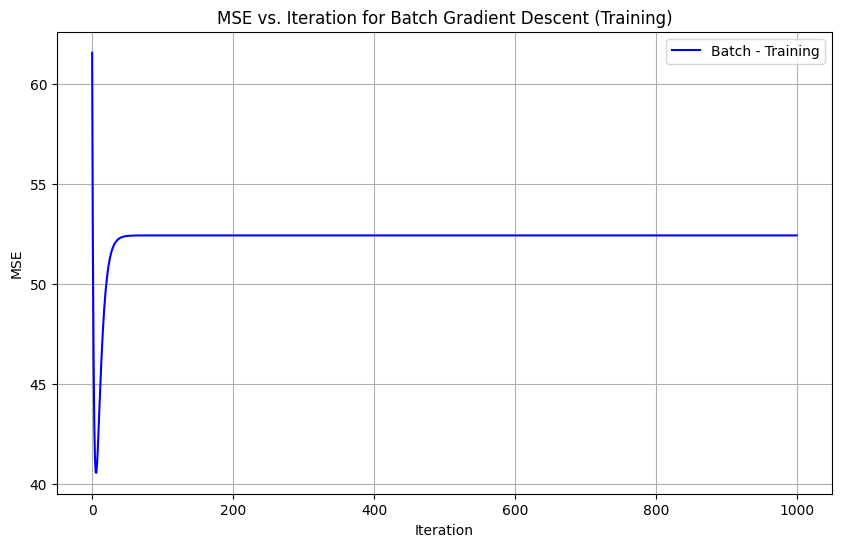

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_mse_history_batch)), train_mse_history_batch, label='Batch - Training', color='blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Batch Gradient Descent (Training)')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting MSE and Iteration convergence for Batch Gradient testing data.

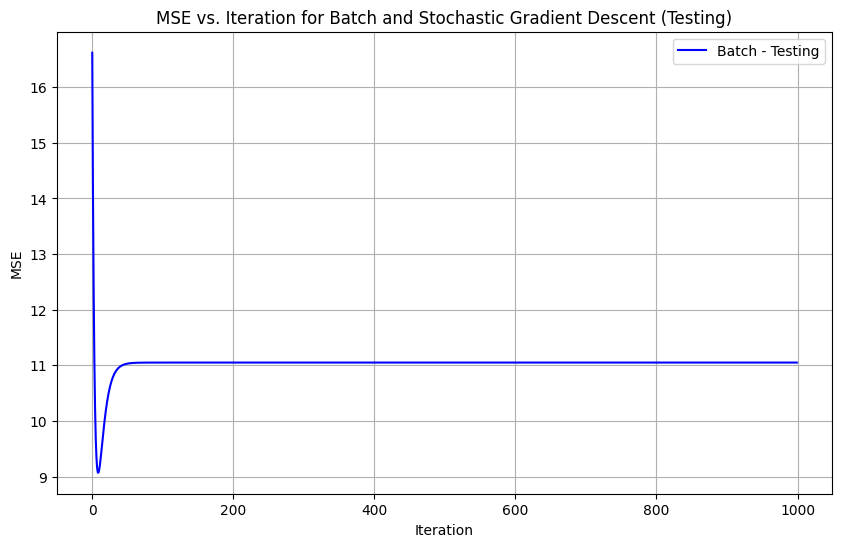

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_mse_history_batch)), test_mse_history_batch, label='Batch - Testing', color='blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Batch and Stochastic Gradient Descent (Testing)')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting MSE and Iteration convergence for Stochastic Gradient training data.

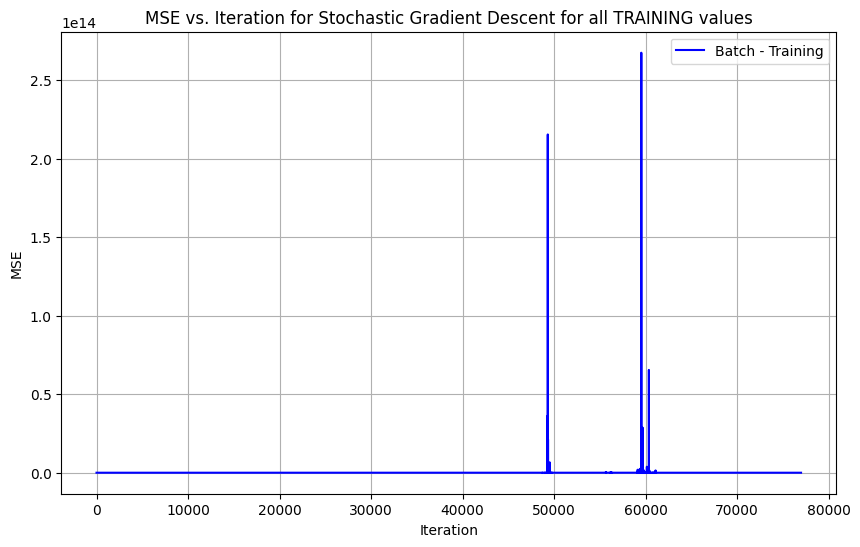

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_mse_history_stochastic)), train_mse_history_stochastic, label='Batch - Training', color='blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Stochastic Gradient Descent for all TRAINING values')
plt.legend()
plt.grid(True)
plt.show()

#### Plotting MSE and Iteration convergence for Stochastic Gradient testing data.

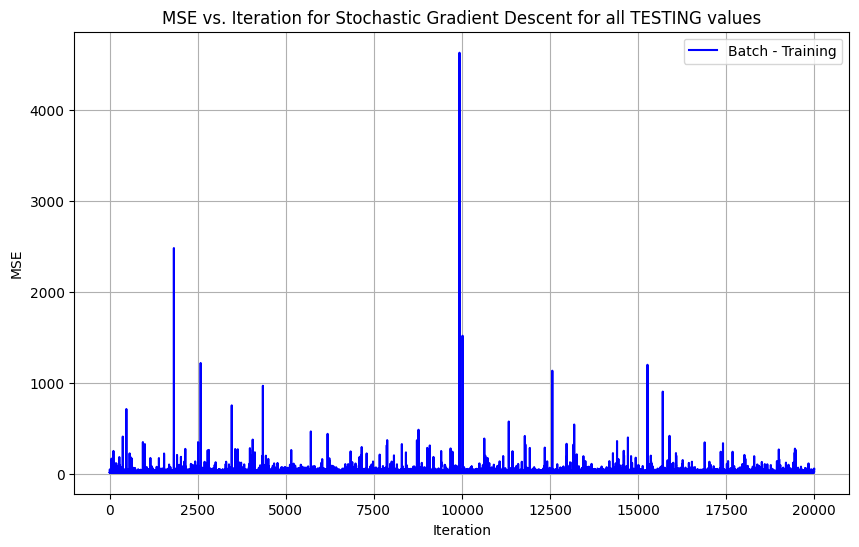

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(test_mse_history_stochastic)), test_mse_history_stochastic, label='Batch - Training', color='blue')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Stochastic Gradient Descent for all TESTING values')
plt.legend()
plt.grid(True)
plt.show()

### 3B - Conclusion 

### In the Batch gradient algorithm for the training data the converged to value 52.3 after 50 iterations.

### In the Batch gradient algorithm for the testing data the converged to value 11.2 after 30 iterations.

### In the Sochastic gradient algorithm for all of the training data the mse spiked after 50000 iteration once and after 60000 iterations once. Since the traing is for each set of values the noumber of iterations are very large as compared to Batch algorithm.

### In the Sochastic gradient algorithm for all of the testing data the mse spiked after few iterations, but mostly maintained a median value below 1000 at all times, which is not bad.

#### Now we will change the learning rate and see the effects.

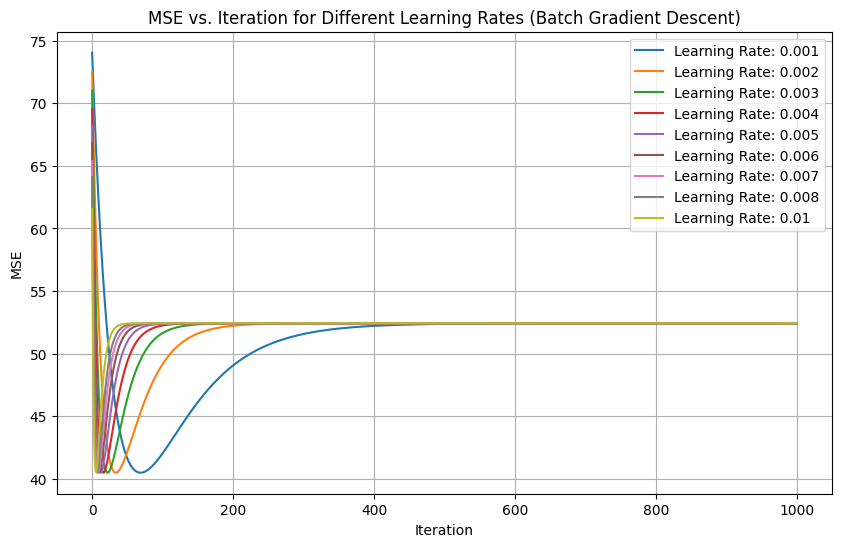

In [194]:
# taking x anf y as inputs.

def multiple_learning_rate_batch_gradient_descent(X, y, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    mse_history = []
    num_iterations=1000
    for iteration in range(num_iterations):

        #Calculating gradients
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        
        #finding theta value.
        theta -= learning_rate * gradients[0,0]

        #Calulating Mean Square Error.
        mse = np.mean((X.dot(theta) - y) ** 2)
        mse_history.append(mse)
        
        #Adding Cost function.
        cost_function = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
        
        #print("MSE :", mse ,"Cost_function :", cost_function)
        if mse > cost_function:
            break
    
    return theta, mse_history


learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005,0.006,0.007,0.008,0.01]  # List of learning rates to iterate over
plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    # Train batch gradient descent
    theta_batch, mse_history_batch = multiple_learning_rate_batch_gradient_descent(x_train_b, y_train_numpy, learning_rate)
    
    # Plot MSE vs. iteration for batch mode
    plt.plot(range(len(mse_history_batch)), mse_history_batch, label=f'Learning Rate: {learning_rate}')


plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Different Learning Rates (Batch Gradient Descent) Testing Set')
plt.legend()
plt.grid(True)
plt.show()

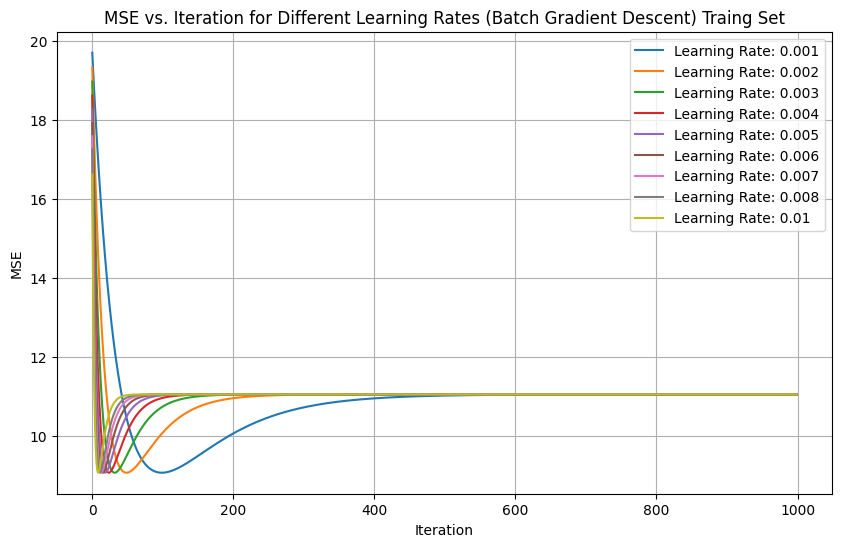

In [195]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005,0.006,0.007,0.008,0.01]  # List of learning rates to iterate over
plt.figure(figsize=(10, 6))

for learning_rate in learning_rates:
    # Train batch gradient descent
    theta_batch, mse_history_batch = multiple_learning_rate_batch_gradient_descent(x_test_b, y_test_numpy, learning_rate)
    
    # Plot MSE vs. iteration for batch mode
    plt.plot(range(len(mse_history_batch)), mse_history_batch, label=f'Learning Rate: {learning_rate}')


plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration for Different Learning Rates (Batch Gradient Descent) Testing Set')
plt.legend()
plt.grid(True)
plt.show()